# Chapter17. 하이퍼파라미터와 튜닝(1)

## 17.1 하이퍼파라미터와 튜닝
  **_하이퍼파라미터_**
   - 머신러닝의 학습과정 전체를 자동화 하는 것은 어렵다. 즉, 사람손으로 모델조정하지 않으면 안되는 경우가 있다.
   - 하이퍼파라미터는 머신러닝 모델을 학습시킬 때, 사람이 직접 조정해야 하는 파라미터이다.
   - 하이퍼파라미터는 선택한 머신러닝 방식에 따라 다르므로, 모델별로 확인한다.
   
  **_튜닝_**
   - 하이퍼파라미터를 조정하는 것을 튜닝이라고 한다. 
   - 조정방법은 : 모델에 직접 값을 입력, 하이퍼파라미터 값의 범위를 지정함으로서 최적의 값을 찾아내기 등이 있다.
   - scikit-learn은 모델 구축 시, 파라미터에 값을 입력하여 튜닝할 수 있다.
   - 파라미터 입력하지 않을 경우, 모델별로 정해져 있는 파라미터 초기값이 그대로 지정된다.

In [2]:
# 17-1 : 튜닝의 예
# model = Classifier(param1=1.0, param2=True, param3="linear")

## 17.2. 로지스틱 회귀의 하이퍼파라미터
### 17.2.1. 파라미터 C
  **_로지스틱 회귀의 파라미터 C_**
   - C는 모델이 학습하는 식별 경계선을 지도 데이터의 분류 오류에 대해 얼마나 엄격하게 규제할 지 나타내는 지표.
   - C값이 클 수록 모델은 지도 데이터를 완전히 분류할 수 있는 식별 경계선을 학습하게 된다.
   - 그러나 지도 데이터를 과학습하여, 훈련데이터 이외의 데이터까지 예측수행하여 정황도 떨어지는 경우 : 과적합
   - C값을 작게 설정시, 지도 데이터의 분류 오류에 관대해짐 : 분류 실수를 허용함으로서, 일반화된 경계선 : 경계를 잘 식별못함
   - scikit-learn의 LogisticRegression 모델에서의 C초기값은 1.0 이다.

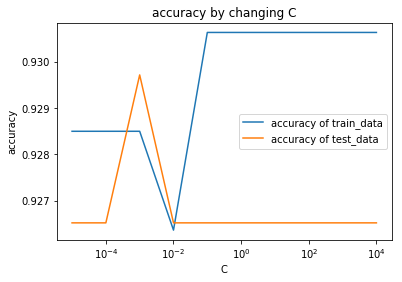

In [5]:
# 17-2 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# 데이터를 생성합니다
X, y = make_classification(
    n_samples=1250,
    n_features=4,
    n_informative=2,
    n_redundant=2,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# C값의 범위를 설정합니다. 여기에서는 1e-5, e-4,1e-3,0,01, 0,1,1,10,100,1000,10000으로 설정
C_list = [10**i for i in range(-5, 5)]

# 그래프 작성용 빈 리스트를 준비합니다.
train_accuracy = []
test_accuracy = []

# 다음 코드를 작성하세요
# for문으로 C_list에 담겨 있는 C값을 꺼내 모델을 학습시키세요
# 로지스텍 회귀 모델의 C값을 조절하려면, 모델을 만들 때, 다음처럼 인수에 C 값을 전달합니다
for C in C_list:
    # originally : model = LogisticRegression() --->
    model = LogisticRegression(C=C, random_state=42)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

    
    

# 코드 편집은 여기까지입니다.
# 그래프를 플롯합니다.
# semilogy()는 X의 스케일을 10의 x승의 스케일로 변경합니다.
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### 17.2.2. 파라미터 penalty
   - 파라미터 C가 분류 오류의 허용도를 나타낸다면, penalty는 모델의 복잡성에 대한 페널티를 나타낸다.
   - penalty에 입력할 수 있는 값으 L1, L2 2개이다.
 **L1**
   - 데이터의 특징량을 줄임으로써, 식별 경계선의 일반화를 도모하는 패널티
 **L2**
   - 데이터 전체의 가중치를 줄임으로써, 식별 경계선의 일반화를 도모하는 패널티
   
 **_L1 vs L2 : 데이터의 각각의 특징량과 데이터 전체의 가중치?_**

### 17.2.3. 파라미터 multi_class
   - multi_class는 다항분류에서 모델의 동작을 결정하는 파라미터
   - 로지스틱 회귀에는 ovr과 multinomial의 두 값이 포함되어 있다
   
   * **_ovr_** : 클래스에 대해 [속하는]/[속하지 않는]의 두 값으로 답하는 문제에 적합
   
   * **_multinomial_** : 각 클래스로 분류될 확률도 고려되어, [속하는]/[속하지 않는] 뿐만 아니라, [속할 가능성은 얼마인가?]를 다루는 문제에 적합

### 17.2.4. 파라미터 random_state
   - 모델이 학습 시, 데이터를 처리해 나가는 순서를 제어하는 파라미터를 random_state라고 한다.
   - 로지스틱 회귀 모델의 경우, 처리 순서 때문에 경계선이 크게 변경되기도 한다.
   - random_State의 값을 고정하여 동일한 학습 결과를 보존할 수 있다.
   - 이 책에서도 결과가 변하지 않도록 random_state를 기본적으로 고정 (아하 그래서 42로 늘 고정했구만)
   - 실제 구현시는 데이터의 재현성을 생각하여 random_state의 값을 고정하는 게 좋단다 (학습결과가 달라지지 않게 하기 위해)

## 17.3. 선형 SVM의 하이퍼파라미터
### 17.3.1. 파라미터 C
   - SVM (Support Vector Machine)도 로지스틱 회귀처럼, 분류 오류의 허용 오차를 나타내는 C가 파라미터로 정의되어있다.
   - SVM은 로지스틱 회귀에 비해 C에 의한 데이터 라벨의 예측치 변동이 심함
   - 선형 SVM 모델에서는 C의 초깃값이 1.0이며, LinearSVC 모듈을 이용한다

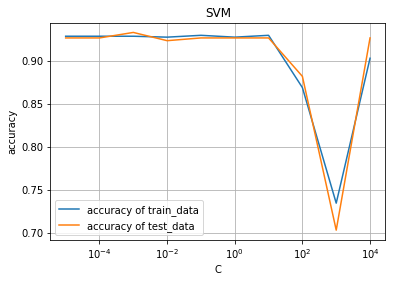

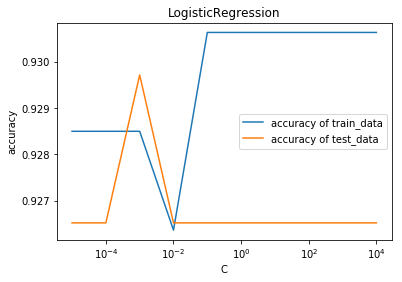

In [6]:
# 17-4
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Data Generate
X, y = make_classification(
    n_samples=1250,
    n_features=4,
    n_informative=2,
    n_redundant=2,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# C값의 범위를 설정
C_list = [10**i for i in range(-5,5)]

# 그래프 작성용 빈 리스트를 준비
svm_train_accuracy = []
svm_test_accuracy = []
log_train_accuracy = []
log_test_accuracy =[]

# 다음 코드를 작성하세요
for C in C_list:
    model1 = LinearSVC(C=C, random_state=42)
    model1.fit(train_X, train_y)
    svm_train_accuracy.append(model1.score(train_X, train_y))
    svm_test_accuracy.append(model1.score(test_X, test_y))
    
    model2 = LogisticRegression(C=C, random_state=42)
    model2.fit(train_X, train_y)
    
    log_train_accuracy.append(model2.score(train_X, train_y))
    log_test_accuracy.append(model2.score(test_X, test_y))
    

# 코드 편집은 여기까지 


# 그래프를 플롯합니다
# semilogx()는 x의 스케일을 10의 x승의 스케일로 변경합니다
fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.set_title("SVM")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
ax.legend()
ax.plot()
plt.show()
fig2=plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title("LogisticRegression")
ax2.set_xlabel("C")
ax2.set_ylabel("accuracy")
ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
ax2.legend()
ax2.plot()
plt.show()

### 17.3.2. 파라미터 penalty
   - 로지스틱 회귀와 마찬가지로, 선형 SVM에도 penalty 파라미터가 있으며, L1, L2로 값을 설정하는 것도 동일하다.
   - L1 penalty는 주성분을 추출하는 기능이 있다
   - L2 penalty는 특정 상관성을 보지 않고, 데이터 전체의 관계를 이용하여 모델에 설명하려고 한다.
   - 예 : B=2A, C=A의 관계가 있을 떄, L1 penalty는 B와 C의 가중치를 줄이고 A만으로 모델에 설명하도록 작동한다.

### 17.3.3. 파라미터 multi_class
   - multi_class는 다항 분류에서 모델의 동작을 결정하는 파라미터
   - 선형 SVM에서는 ovr, crammer_singer의 두 값이 포함되어 있다.
   - ovr쪽이 동작이 가볍고 결과가 좋다
   - 이항 분류의 경우 이 파라미터를 설정할 필요가 없다

### 17.3.4. 파라미터 random_state
   - random_state는 결과를 고정할 때 사용, SVM의 경우는 서포트 벡터의 결정에도 영향을 준다.

## 17.4. 비선형 SVM의 하이퍼파라미터
### 17.4.1. 파라미터 C
   - 선형 분리가 가능하지 않은 데이터를 취급하는 경우, SVM의 SVC (support vector classifier)라는 모듈 사용
   - SVC에서도 로지스틱 회귀와 같은 파라미터 C가 존재하며, 학습시 분류오류를 얼마나 허용할지 지정
   - 비선형 SVM에서는 C를 소프트 마진 페널티라고 한다.

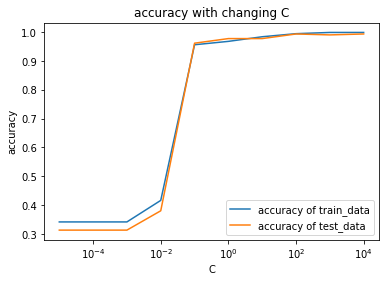

In [1]:
# 17-6
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# Deta Generate
X, y = make_gaussian_quantiles(
    n_samples=1250,
    n_features=2,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# C값의 범위 설정
C_list = [10**i for i in range(-5, 5)]

# 그래프 작성용 빈 리스트를 준비합니다.
train_accuracy = []
test_accuracy = []

# 다음 코드를 작성하세요
for C in C_list:
    # for 문으로 C_list에 담겨 있는 C값을 꺼내 모델을 학습
    # 비선형 SVM의 C값을 조정하려면, 모델을 만들 떄, 다음과 같이 인수에 C값을 전달합니다.
    # model = SVC(C=1.0, random_state=42)
    # 지도 데이터와 테스트 데이터의 정확도를 각각 train_accuracy, test_accuracy리스트에 넣으세요
    model = SVC(C=C)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))
    
# 코드 편집은 여기까지 입니다.
# 그래프를 플롯합니다.
# semilogx()는 x의 스케일을 10의 x승의 스케일로 변경합니다.
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()


### 17.4.2. 파라미터 kernel
   - 파라미터 kernel은 비선형SVM에서 특히 중요한 파라미터로.
   - 받아들인 데이터를 조작해서 분류하기 쉬운 형태로 만들어주는 함수를 정의하는 파라미터이
   - linear, rbf, poly, sigmoid, precomputed의 다섯 값을 취할 수 있으며, 기본은 rbf
   
   **linear**
      선형 SVM, LinearSVC와 거의 동일.
   **rbf, poly** 
      입체투영과 같음. 다른 것에 비해 상대적으로 높은 정확도.
   **precomputed**
      데이터 전처리로 미리 가공된 경우에 사용
   **sigmoid**
      로지스틱 회귀모델과 동일한 작업을 수행

### 17.4.3. 파라미터 decision_function_shape
   - decision_function_shape은 SVC의 multi_class파라미터와 같다 (ovo, ovr)
   - ovo : 클래스끼리의 페어를 만들고, 그 페어에서 이항분류를 실시해 다수결로 속하는 클래스를 결정
           ovo는 one vs one의 약자로, 각 클래스 간의 시합으로 분류기를 작성하여 예측
   - ovr : 하나의 클래스와 그 외로 분류하여 다수결에 속하는 클래스를 결정. 계산량 많고 데이터 증가에 비례해 동작이 무거워짐
           ovr은 one vs rest의 약자로, 클래스 자신과 그 이외를 분류하는 분류기를 작성하여 예측한다.
   

### 17.4.4. 파라미터 random_state
   - 데이터의 처리 순서에 관계하는 파라미터
   - 예측 결과 재현을 위해 학습단계에서는 고정 권장

In [2]:
# 17-8 : 난수 생성기를 지정하는 예
import numpy as np
from sklearn.svm import SVC

# 난수 생성기를 구축합니다
random_state = np.random.RandomState()

# 비선형 SVM모델을 구축합니다. (난수 생성기를 random_state로 지정)
model = SVC(random_state = random_state)

In [3]:
# 17-9
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data generation
X, y = make_classification(
    n_samples=1250,
    n_features=4,
    n_informative=2,
    n_redundant=2,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 난수 생성기를 구축하세요
random_state = np.random.RandomState()

# 모델을 구축하세요
model = SVC(random_state=random_state)

# 모델을 학습시키세요
model.fit(train_X, train_y)

# 테스트 데이터에 대한 정확도를 출력하세요
print(model.score(test_X, test_y))

0.9488817891373802


In [4]:
# 17-11
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Data Generate
X, y = make_classification(
    n_samples=1250,
    n_features=4,
    n_informative=2,
    n_redundant=2,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']

# 다음 코드를 작성하세요
# 모델을 구축하세요
for i in kernel_list:
    model = SVC(kernel=i, random_state=42)
    # 모델을 학습시키세요
    model.fit(train_X, train_y)
    
    # 테스트 데이터에 대한 정확도를 출력하세요
    print(i)
    print(model.score(test_X, test_y))
    print()

linear
0.9329073482428115

rbf
0.9488817891373802

poly
0.9361022364217252

sigmoid
0.9169329073482428

